In [1]:
import pandas as pd

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample_submission=pd.read_csv("sample_submission.csv")

In [3]:
train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [4]:
print("train shape:",train.shape)

train shape: (750000, 12)


In [5]:
print("test shape:" , test.shape)

test shape: (250000, 11)


In [6]:
print(train.columns)

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [8]:
train.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [9]:
train.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [10]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Distribution of Listening Time')

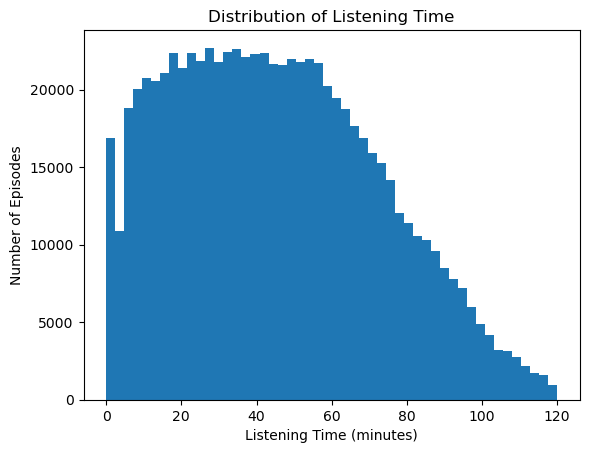

In [11]:
plt.hist(train['Listening_Time_minutes'], bins=50)
plt.xlabel("Listening Time (minutes)")
plt.ylabel("Number of Episodes")
plt.title("Distribution of Listening Time")


In [12]:
train['Listening_Time_minutes'].head().astype(int)

0    31
1    88
2    44
3    46
4    75
Name: Listening_Time_minutes, dtype: int64

In [13]:
train['Episode_Length_minutes']=train['Episode_Length_minutes'].fillna(train['Episode_Length_minutes'].median()
)

In [14]:
train['Guest_Popularity_percentage']=train['Guest_Popularity_percentage'].fillna(train['Guest_Popularity_percentage'].mean()
)

In [15]:
train = train[train['Number_of_Ads'].notna()]

In [16]:
train.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

In [17]:
train.dtypes

id                               int64
Podcast_Name                    object
Episode_Title                   object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
dtype: object

In [18]:
train.drop(columns=['Episode_Title', 'id'], inplace=True)

In [19]:
train.dtypes

Podcast_Name                    object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
dtype: object

In [20]:
train[['Podcast_Name', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']].nunique()


Podcast_Name         48
Genre                10
Publication_Day       7
Publication_Time      4
Episode_Sentiment     3
dtype: int64

In [21]:
top_podcasts=train['Podcast_Name'].value_counts().nlargest(5)
top_podcasts

Podcast_Name
Tech Talks       22847
Sports Weekly    20053
Funny Folks      19635
Tech Trends      19549
Fitness First    19488
Name: count, dtype: int64

In [22]:
train['Podcast_Name'] = train['Podcast_Name'].apply(lambda x: x if x in top_podcasts else 'Other')

In [23]:

train = pd.get_dummies(train, columns=['Podcast_Name', 'Genre', 'Episode_Sentiment', 'Publication_Time'], drop_first=True)


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Publication_Day'] = le.fit_transform(train['Publication_Day'])


In [25]:
train['Episode_Length_minutes'].describe()

count    749999.000000
mean         64.427585
std          30.996999
min           0.000000
25%          39.420000
50%          63.840000
75%          90.310000
max         325.240000
Name: Episode_Length_minutes, dtype: float64

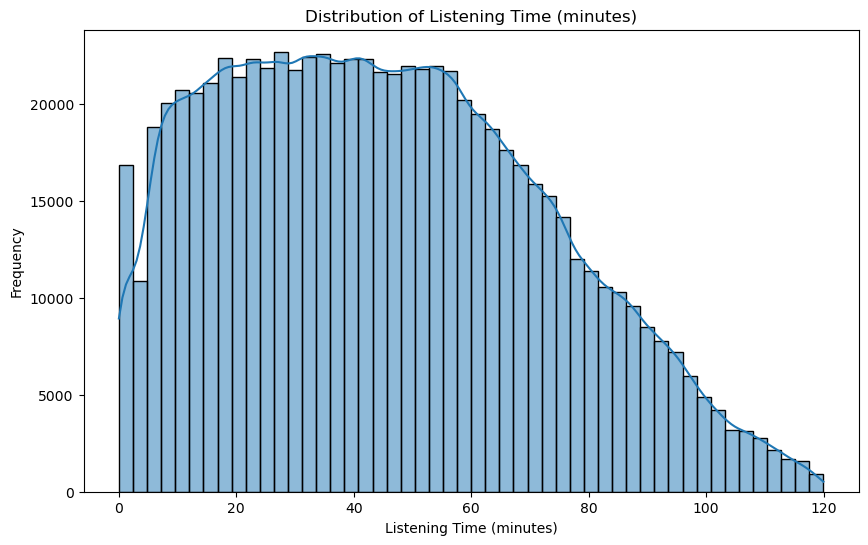

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train['Listening_Time_minutes'], bins=50,kde = True)
plt.title('Distribution of Listening Time (minutes)')
plt.xlabel('Listening Time (minutes)')
plt.ylabel('Frequency')
plt.show()


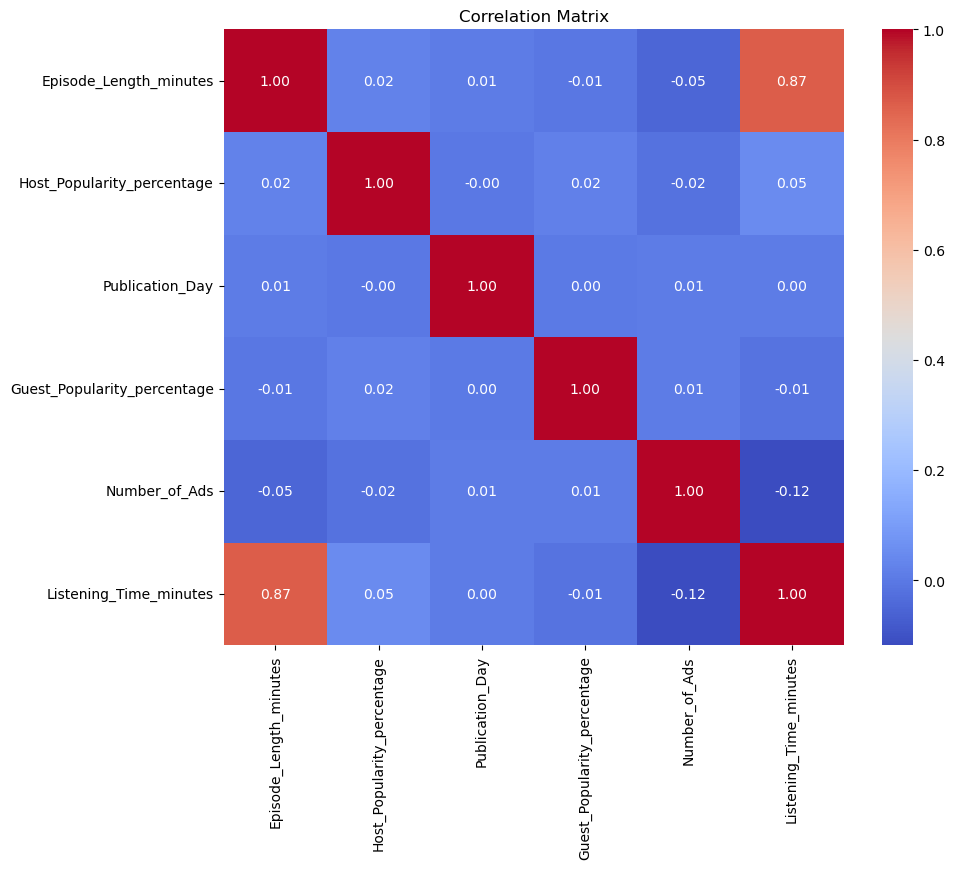

In [27]:
#correlation matrix
numeric_features = train.select_dtypes(include=['float64', 'int64'])
correlation = numeric_features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [28]:
print(train.columns)


Index(['Episode_Length_minutes', 'Host_Popularity_percentage',
       'Publication_Day', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Listening_Time_minutes', 'Podcast_Name_Funny Folks',
       'Podcast_Name_Other', 'Podcast_Name_Sports Weekly',
       'Podcast_Name_Tech Talks', 'Podcast_Name_Tech Trends', 'Genre_Comedy',
       'Genre_Education', 'Genre_Health', 'Genre_Lifestyle', 'Genre_Music',
       'Genre_News', 'Genre_Sports', 'Genre_Technology', 'Genre_True Crime',
       'Episode_Sentiment_Neutral', 'Episode_Sentiment_Positive',
       'Publication_Time_Evening', 'Publication_Time_Morning',
       'Publication_Time_Night'],
      dtype='object')


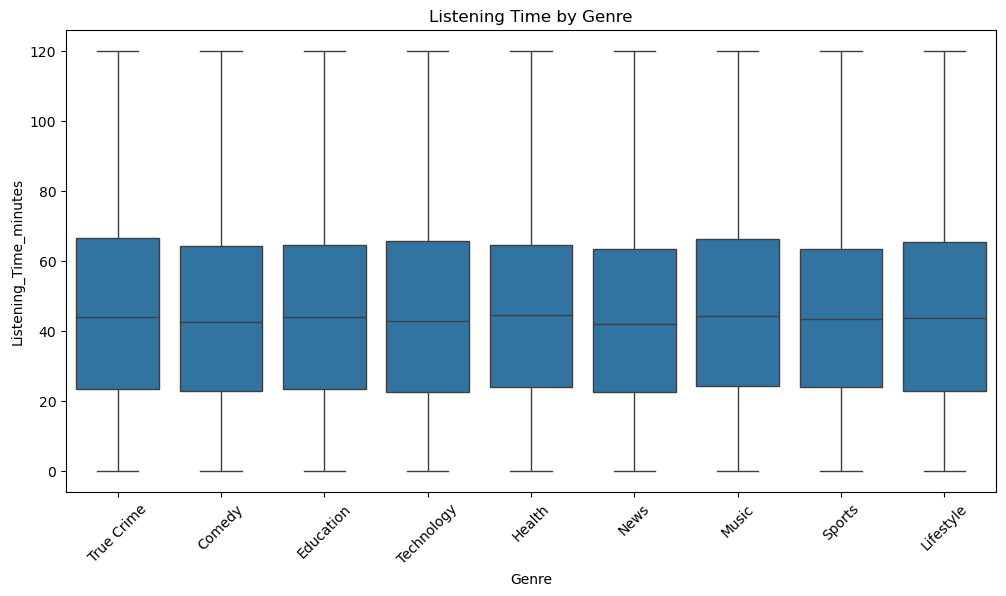

In [29]:

genre_columns = [col for col in train.columns if col.startswith('Genre_')]


train['Genre'] = train[genre_columns].idxmax(axis=1).str.replace('Genre_', '')

# Now plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Listening_Time_minutes', data=train)
plt.title('Listening Time by Genre')
plt.xticks(rotation=45)
plt.show()


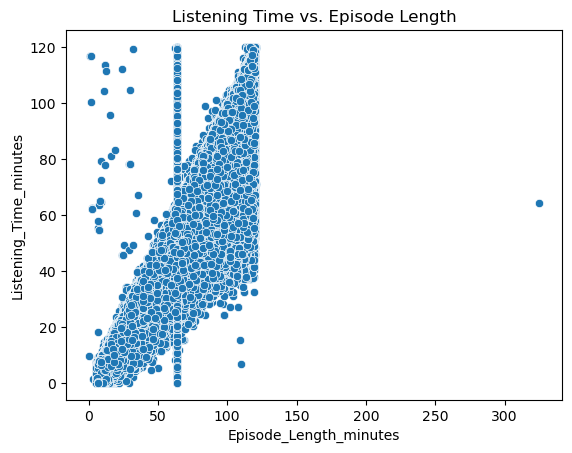

In [30]:
sns.scatterplot(x='Episode_Length_minutes', y='Listening_Time_minutes', data=train)
plt.title('Listening Time vs. Episode Length')
plt.show()


In [31]:
sentiment_columns = [col for col in train.columns if col.startswith('Episode_Sentiment_')]
train['Episode_Sentiment'] = train[sentiment_columns].idxmax(axis=1).str.replace('Episode_Sentiment_', '')


In [32]:
import numpy as np
train['Listening_Time_log'] = np.log1p(train['Listening_Time_minutes'])


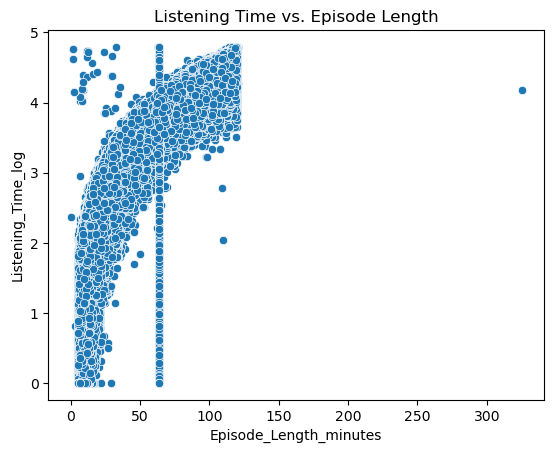

In [33]:
sns.scatterplot(x='Episode_Length_minutes', y='Listening_Time_log', data=train)
plt.title('Listening Time vs. Episode Length')
plt.show()

In [34]:
threshold = train['Listening_Time_minutes'].quantile(0.99)
train_filtered = train[train['Listening_Time_minutes'] <= threshold]


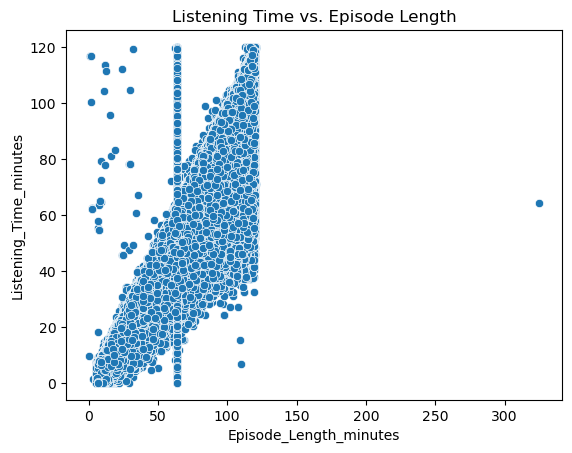

In [35]:
sns.scatterplot(x='Episode_Length_minutes', y='Listening_Time_minutes', data=train)
plt.title('Listening Time vs. Episode Length')
plt.show()

In [36]:
# Calculate thresholds for outliers (99th percentile)
listening_time_thresh = train['Listening_Time_minutes'].quantile(0.99)
episode_length_thresh = train['Episode_Length_minutes'].quantile(0.99)

# Filter the dataframe to keep only rows below or equal to those thresholds
train_filtered = train[
    (train['Listening_Time_minutes'] <= listening_time_thresh) & 
    (train['Episode_Length_minutes'] <= episode_length_thresh)
]

# Check new shape and some stats
print(f"Original data size: {train.shape}")
print(f"Filtered data size: {train_filtered.shape}")
print(f"Max Listening Time now: {train_filtered['Listening_Time_minutes'].max()}")
print(f"Max Episode Length now: {train_filtered['Episode_Length_minutes'].max()}")


Original data size: (749999, 28)
Filtered data size: (736693, 28)
Max Listening Time now: 109.39634
Max Episode Length now: 118.89


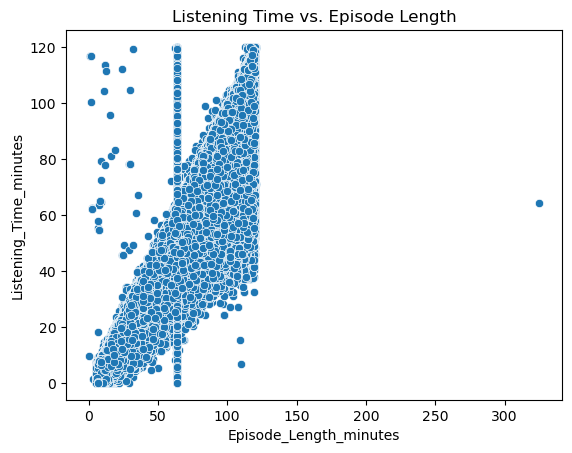

In [37]:
sns.scatterplot(x='Episode_Length_minutes', y='Listening_Time_minutes', data=train)
plt.title('Listening Time vs. Episode Length')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split


X = train.drop(['Listening_Time_minutes'], axis=1)
y = train['Listening_Time_minutes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
X_train.dtypes.value_counts()


bool       19
float64     5
object      2
int64       1
Name: count, dtype: int64

In [40]:
X_train = X_train.astype({col: int for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes('bool').columns})


In [41]:
X_train = X_train.drop(columns=X_train.select_dtypes('object').columns)
X_test = X_test.drop(columns=X_test.select_dtypes('object').columns)


In [42]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


MAE: 7.80
RMSE: 10.50
R² Score: 0.8502


In [44]:
X_train.isnull().sum().sum()     # total missing values
X_train.dtypes.value_counts()    # see if any bools


int64      20
float64     5
Name: count, dtype: int64

In [45]:
print(X_train.shape)
print(y_train.shape)


(599999, 25)
(599999,)


In [46]:
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())
print("Infinite values in X_train:", np.isinf(X_train).sum().sum())


Missing values in X_train: 0
Missing values in y_train: 0
Infinite values in X_train: 0


In [47]:
from sklearn.ensemble import RandomForestRegressor


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [49]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("✅ Model trained.")


✅ Model trained.


In [50]:
import time

start = time.time()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
end = time.time()
print(f"✅ Model trained with 100 trees in {end - start:.2f} seconds.")


✅ Model trained with 100 trees in 215.77 seconds.


In [121]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

#n_estimators                Number of decision trees in the forest	
#max_depth                   Max levels in a tree (deeper = more complex)	
#min_samples_split           Min number of samples needed to split a node	
#min_samples_leaf            Min samples at the bottom leaf	
#max_features                How many features to consider at each split	

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


rf = RandomForestRegressor(random_state=42)


random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # number of combinations to try
    cv=3,       # 3-fold cross validation
    verbose=2,
    n_jobs=-1,  # use all CPU cores
    scoring='neg_mean_absolute_error'
)


random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_
print("✅ Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.8min
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 3.4min
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=  52.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  24.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time= 3.3min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 3.4min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  55.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimat

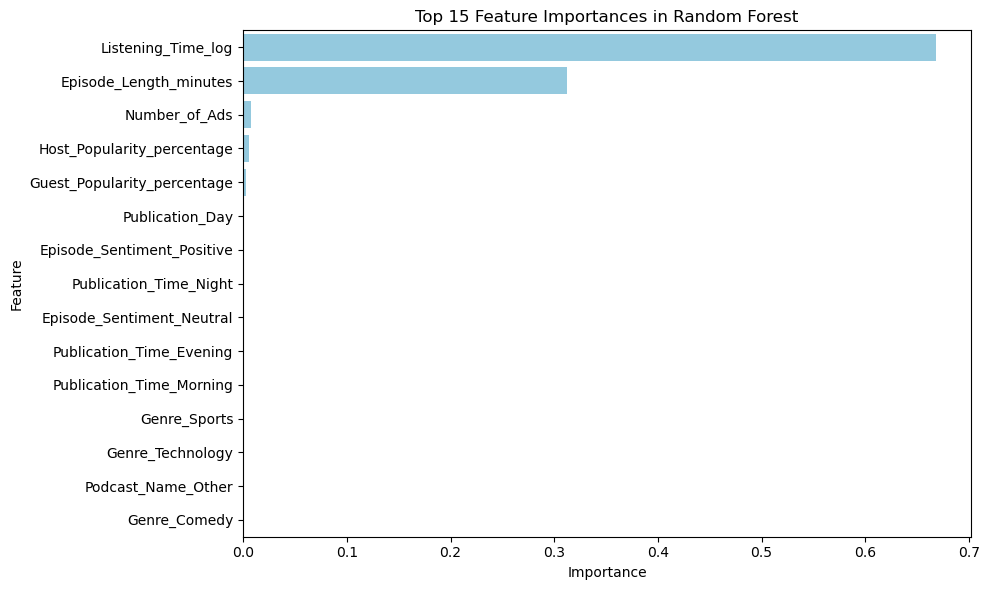

In [127]:

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', color='skyblue')
plt.title('Top 15 Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


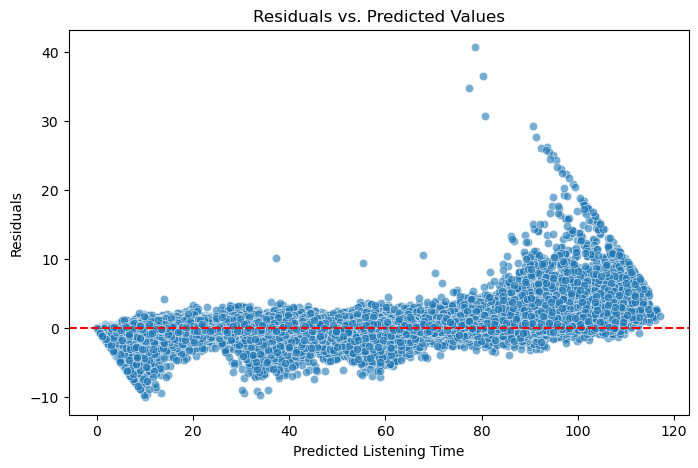

In [129]:


# Predict on test set
y_pred = best_rf.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Listening Time")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()
